In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [2]:
# Load the Online Retail dataset from Excel file
df = pd.read_excel('online_retail.xlsx')

# Rename columns to more meaningful names for easier understanding
df.rename(columns={
    'InvoiceNo': 'order_ID', 
    'StockCode': 'Product_ID',
    'Description': 'Product_name', 
    'Quantity': 'Units_sold',
    'InvoiceDate': 'Purchase_Date'
}, inplace=True)


FileNotFoundError: [Errno 2] No such file or directory: 'online_retail.xlsx'

In [122]:

# Display basic information about the dataset
print(f"Original dataset contains {len(df)} rows and {len(df.columns)} columns")
print("\nColumns available after renaming:", df.columns.tolist())


Original dataset contains 541909 rows and 8 columns

Columns available after renaming: ['order_ID', 'Product_ID', 'Product_name', 'Units_sold', 'Purchase_Date', 'UnitPrice', 'CustomerID', 'Country']


In [ ]:
print("Original data set contains rows : ", len(df))


Original data set contains rows :  541909


In [123]:

# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())



Missing values in each column:
order_ID              0
Product_ID            0
Product_name       1454
Units_sold            0
Purchase_Date         0
UnitPrice             0
CustomerID       135080
Country               0
dtype: int64


In [151]:
# 1. First, remove only null CustomerID
df_clean = df[df['CustomerID'].notna()].copy()
print(f"After removing null CustomerID: {len(df_clean)} rows")


# 3. Keep only positive Units_sold and UnitPrice
df_clean = df_clean[(df_clean['Units_sold'] > 0) & (df_clean['UnitPrice'] > 0)]
print(f"After positive filters: {len(df_clean)} rows")

# 4. Calculate TotalAmount
df_clean['TotalAmount'] = df_clean['Units_sold'] * df_clean['UnitPrice']
print(f"Final cleaned data: {len(df_clean)} rows")

After removing null CustomerID: 406829 rows
After positive filters: 397884 rows
Final cleaned data: 397884 rows


In [125]:

# Display statistical summary to understand data distribution
print("\nStatistical summary of numerical columns:")
print(df_clean[['Units_sold', 'UnitPrice', 'CustomerID']].describe())



Statistical summary of numerical columns:
          Units_sold      UnitPrice     CustomerID
count  397884.000000  397884.000000  397884.000000
mean       12.988238       3.116488   15294.423453
std       179.331775      22.097877    1713.141560
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000


In [154]:
df_clean.info()
#df_clean.columns

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   order_ID       397884 non-null  object        
 1   Product_ID     397884 non-null  object        
 2   Product_name   397884 non-null  object        
 3   Units_sold     397884 non-null  int64         
 4   Purchase_Date  397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  float64       
 7   Country        397884 non-null  object        
 8   TotalAmount    397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [127]:
df_clean.describe()

,Units_sold,Purchase_Date,UnitPrice,CustomerID,TotalAmount
count,397884.000000,397884,397884.000000,397884.000000,397884.000000
mean,12.988238,2011-07-10 23:41:23.511023360,3.116488,15294.423453,22.397000
min,1.000000,2010-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2011-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2011-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2011-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2011-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,179.331775,NaN,22.097877,1713.141560,309.071041


In [128]:

df_clean.isnull().sum()

order_ID         0
Product_ID       0
Product_name     0
Units_sold       0
Purchase_Date    0
UnitPrice        0
CustomerID       0
Country          0
TotalAmount      0
dtype: int64

In [155]:
# 1. First, remove only null CustomerID
df_clean = df[df['CustomerID'].notna()].copy()
print(f"After removing null CustomerID: {len(df_clean)} rows")



After removing null CustomerID: 406829 rows


In [ ]:
# Simple duplicate check for your dataset
print("Checking for duplicates in your data:")
print(f"Total rows: {len(df_clean)}")
print(f"Exact duplicates: {df_clean.duplicated().sum()}")
print(f"Duplicate orders: {df_clean.duplicated(subset=['order_ID']).sum()}")


Checking for duplicates in your data:
Total rows: 406829
Exact duplicates: 5225
Duplicate orders: 384639


 Duplicate order_ID is normal - it means one order has multiple products. Don't remove these!

In [157]:
# removing orders with negative quantity and unit price equal to 0
# Also removed rows having null customer id as they cannot be used for customer analysis
df_clean = df_clean[(df_clean['Units_sold'] > 0) & (df_clean['UnitPrice'] > 0)]

# Calculate total amount for each transaction
# This will be used for monetary value in RFM analysis
df_clean['TotalAmount'] = df_clean['Units_sold'] * df_clean['UnitPrice']

In [ ]:
df_clean.head()

In [159]:

print(f"Original rows: {len(df_clean)}")
print(f"Columns available: {df_clean.columns.tolist()}")

# Check CustomerID
has_customer = df_clean['CustomerID'].notna()
print(f"Rows with CustomerID: {has_customer.sum()}")



#  Check Units_sold and UnitPrice
if 'Units_sold' in df_clean.columns:
    positive_units = df_clean['Units_sold'] > 0
    print(f"Rows with Units_sold > 0: {positive_units.sum()}")
    
if 'UnitPrice' in df_clean.columns:
    positive_price = df_clean['UnitPrice'] > 0
    print(f"Rows with UnitPrice > 0: {positive_price.sum()}")

Original rows: 397884
Columns available: ['order_ID', 'Product_ID', 'Product_name', 'Units_sold', 'Purchase_Date', 'UnitPrice', 'CustomerID', 'Country', 'TotalAmount']
Rows with CustomerID: 397884
Rows with Units_sold > 0: 397884
Rows with UnitPrice > 0: 397884


In [135]:
len(df_clean)

397884

In [136]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 397884 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   order_ID       397884 non-null  object        
 1   Product_ID     397884 non-null  object        
 2   Product_name   397884 non-null  object        
 3   Units_sold     397884 non-null  int64         
 4   Purchase_Date  397884 non-null  datetime64[ns]
 5   UnitPrice      397884 non-null  float64       
 6   CustomerID     397884 non-null  float64       
 7   Country        397884 non-null  object        
 8   TotalAmount    397884 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.4+ MB


In [34]:
#Here i saved a cleaned my csv file for future use.
df_clean.to_csv('C:\\Users\\moham\\Downloads\\Kamraan\\DA Projects\\online_retail_clean.csv', index=False)

In [138]:
type(df_clean)

pandas.core.frame.DataFrame

In [ ]:
# Check original row count
print("Original data sets rows:", len(df))

print("cleaned data sets rows:", len(df_clean))

Original data sets rows: 541909
cleaned data sets rows: 397884


In [160]:
# Save the cleaned dataframe as Excel file
# Excel format keeps data types and formatting better
df_clean.to_excel('cleaned_retail_data.xlsx', index=False)
print("Saved cleaned data as Excel: 'cleaned_retail_data.xlsx'")

Saved cleaned data as Excel: 'cleaned_retail_data.xlsx'


In [161]:
# Save the cleaned dataframe as CSV file
df_clean.to_csv('cleaned_retail_data.csv', index=False)
print("Saved cleaned data as CSV: 'cleaned_retail_data.csv'")

Saved cleaned data as CSV: 'cleaned_retail_data.csv'


In [162]:
df_clean.columns

Index(['order_ID', 'Product_ID', 'Product_name', 'Units_sold', 'Purchase_Date',
       'UnitPrice', 'CustomerID', 'Country', 'TotalAmount'],
      dtype='object')

In [ ]:
df_clean.head()

In [ ]:
import sqlite3
import pandas as pd

# 1. Load your data
df = pd.read_csv('cleaned_retail_data.csv')

# 2. Create (or connect to) a local database file
# This will create a file named 'RetailProject.db' in your folder
conn = sqlite3.connect('RetailProject.db')

# 3. Upload the data
df.to_sql('cleaned_retail', conn, if_exists='replace', index=False)

print("✅ Data successfully uploaded to SQLite!")

# 4. Verify with a quick SQL query
query = "SELECT * FROM cleaned_retail LIMIT 5"
check_df = pd.read_sql(query, conn)
print(check_df)

# Close the connection
conn.close()

In [174]:
import sqlite3
import pandas as pd

# 1. Connect to your SQLite database
conn = sqlite3.connect('RetailProject.db')

# 2. SQL Query to create the Customer-Level Table
# We use '2011-12-10' as our reference point (the day after the last sale)
rfm_query = """
SELECT 
    CustomerID,
    MAX(Country) AS Country,
    COUNT(DISTINCT order_ID) AS Frequency,
    SUM(TotalAmount) AS Monetary,
    CAST(julianday('2011-12-10') - julianday(MAX(Purchase_Date)) AS INT) AS Recency
FROM cleaned_retail
GROUP BY CustomerID
"""

# 3. Load the results into a DataFrame
df_customer_stats = pd.read_sql(rfm_query, conn)

# 4. Define Churn (Target Variable)
# 90 days is a standard retail benchmark for 'churn'
df_customer_stats['Is_Churned'] = df_customer_stats['Recency'].apply(lambda x: 1 if x > 90 else 0)

# 5. Save this for Power BI
df_customer_stats.to_csv('Customer_Churn_Master.csv', index=False)

print("✅ Customer-level RFM table created!")
print(df_customer_stats.head())

conn.close()

✅ Customer-level RFM table created!
   CustomerID         Country  Frequency  Monetary  Recency  Is_Churned
0     12346.0  United Kingdom          1  77183.60      325           1
1     12347.0         Iceland          7   4310.00        2           0
2     12348.0         Finland          4   1797.24       75           0
3     12349.0           Italy          1   1757.55       18           0
4     12350.0          Norway          1    334.40      310           1


In [175]:
# Statistical Summary of Churn vs Active
summary = df_customer_stats.groupby('Is_Churned')[['Recency', 'Frequency', 'Monetary']].mean()
print("Average Metrics by Churn Status:")
print(summary)

# Churn Rate Calculation
churn_rate = df_customer_stats['Is_Churned'].mean() * 100
print(f"\nOverall Churn Rate: {churn_rate:.2f}%")

Average Metrics by Churn Status:
               Recency  Frequency     Monetary
Is_Churned                                    
0            31.337833   5.484251  2726.250430
1           213.125604   1.855072   714.472333

Overall Churn Rate: 33.40%


--- Monetary Value Statistical Test ---
T-Statistic: 9.46
P-Value: 0.0000000000


C:\Users\moham\AppData\Local\Temp\ipykernel_14492\261288640.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Is_Churned', y='Monetary', data=df_customer_stats, palette="Set2")


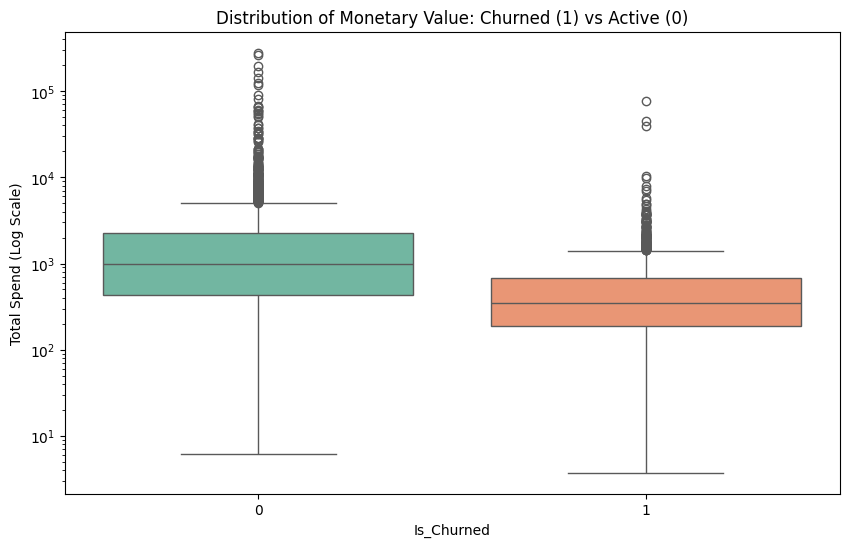

In [176]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Split the data into two groups
active = df_customer_stats[df_customer_stats['Is_Churned'] == 0]
churned = df_customer_stats[df_customer_stats['Is_Churned'] == 1]

# 2. Perform the T-Test (Comparing the means of the two groups)
# We test: Is there a real difference in Monetary Value?
t_stat, p_val = stats.ttest_ind(active['Monetary'], churned['Monetary'], equal_var=False)

print(f"--- Monetary Value Statistical Test ---")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_val:.10f}") # If this is < 0.05, it is significant!

# 3. Visualization: The "Boxplot" for your Portfolio
plt.figure(figsize=(10, 6))
sns.boxplot(x='Is_Churned', y='Monetary', data=df_customer_stats, palette="Set2")
plt.title('Distribution of Monetary Value: Churned (1) vs Active (0)')
plt.yscale('log') # Monetary values vary a lot, so we use a log scale to see the box
plt.ylabel('Total Spend (Log Scale)')
plt.show()

In [178]:
# Create 1-5 scores for Recency, Frequency, and Monetary
# Note: For Recency, a LOWER number is better, so labels are [5,4,3,2,1]
df_customer_stats['R_Score'] = pd.qcut(df_customer_stats['Recency'], 5, labels=[5, 4, 3, 2, 1])
df_customer_stats['F_Score'] = pd.qcut(df_customer_stats['Frequency'].rank(method='first'), 5, labels=[1, 2, 3, 4, 5])
df_customer_stats['M_Score'] = pd.qcut(df_customer_stats['Monetary'], 5, labels=[1, 2, 3, 4, 5])

# Save the final file for Power BI
df_customer_stats.to_csv('Final_Customer_Data_for_PowerBI.csv', index=False)
print("✅ Final data ready for Power BI!")

✅ Final data ready for Power BI!
